## <font color = "navy" size = 5>Brain Stroke Prediction</font>

### <font color = "purple" size = 3>**About Brain Stroke**</font>
<p style="font-family: Times New India; font-size:1.3em;">
Brain stroke is a medical emergency that occurs when the blood supply to part of the brain is interrupted or reduced.  
This sudden interruption in blood flow can cause brain cells to die within minutes which leads to severe consequences.  
</p>
<p style="font-family: Times New India; font-size:1.3em;">
    The impact of a stroke depends on its severity and the part of the brain affected.  
Some individuals recover completely, while others may experience long-term disabilities affecting movement, speech, cognition, or other functions. </p> 

### <font color = "maroon" size = 3>**Problem Statement:**</font> 
<p style="font-family: Times New India; font-size:1.3em;">
To develop a machine learning model capable of predicting the risk of an individual experiencing a stroke.</p>

<p style="font-family: Times New India; font-size:1.3em;">
Machine learning models can analyze various factors like medical history, lifestyle, and health data to identify patterns that indicate a higher risk of strokes. Detecting these patterns early allows for timely intervention and preventive measures.</br>     
Predictive models can assist healthcare providers in identifying individuals at higher risk, enabling proactive interventions to lower those risks. This can potentially reduce the occurrence and severity of strokes.</p>  

---

### $\color{purple}{\text{The libraries used in processing the dataset.}}$ 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#########################################################################################
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, recall_score, classification_report
#########################################################################################
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
#########################################################################################
from collections import Counter
from imblearn.over_sampling import SMOTE 
from imblearn.combine import SMOTEENN
from sklearn.preprocessing import StandardScaler
#########################################################################################
import warnings
warnings.filterwarnings("ignore")

---

In [2]:
brain_stroke = pd.read_csv(r"D:\Datasets\stroke.csv")
# Importing the dataset. It's a csv file. 
# The data is taken from Kaggle

### $\color{navy}{\text{Attribute Information}}$

1. **id**
2. **gender**: "Male" or "Female"  
3. **age**: age of the patient  
4. **hypertension**: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension  
5. **heart_disease**: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease  
6. **ever_married**: "No" or "Yes"  
7. **work_type**: "children", "Govtjov", "Private" or "Self-employed"   
8. **Residence_type**: "Rural" or "Urban"   
9. **avg_glucose_level**: average glucose level in blood  
10. **bmi**: body mass index  
12. **smoking_status**: "formerly smoked", "never smoked", "smokes" or "Unknown"*  
13. **stroke**: 1 if the patient had a stroke or 0 if not  

In [3]:
brain_stroke.sample(5)
# The random 5 records of the data to get the overall idea about the data. 

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
1698,6879,Female,44.0,0,0,No,Govt_job,Urban,215.90,41.8,smokes,0
3565,68302,Female,40.0,0,0,Yes,Private,Urban,65.77,31.2,never smoked,0
3555,47309,Male,9.0,0,0,No,children,Urban,87.74,17.1,Unknown,0
1479,43059,Female,71.0,0,0,Yes,Self-employed,Rural,151.30,26.3,never smoked,0
1138,1893,Female,38.0,0,0,Yes,Private,Urban,91.68,42.8,formerly smoked,0


In [4]:
brain_stroke.shape
# The data contains almost 5000 records.

(5110, 12)

In [5]:
brain_stroke.select_dtypes(include='float64').describe().T
# To check the  statistical analysis of all numerical type attributes  (count, mean, standaard deviation, minimum values, all quartiles, maximum values)

,count,mean,std,min,25%,50%,75%,max
age,5110.0,43.226614,22.612647,0.08,25.000,45.000,61.00,82.00
avg_glucose_level,5110.0,106.147677,45.283560,55.12,77.245,91.885,114.09,271.74
bmi,4909.0,28.893237,7.854067,10.30,23.500,28.100,33.10,97.60


In [6]:
brain_stroke.info()
# Provides the data type of all attributes and the number of NOT NULL values count is obtained

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


---

### $\color{navy}{\text{Data Pre-Processing And EDA}}$


In [7]:
# correcting data
stroke = brain_stroke.copy()
# "Residence_type" feature renaming
stroke.rename(columns={'Residence_type': 'residence_type'}, inplace=True)
# unnecessary feature droping
stroke.drop('id', axis=1, inplace=True)
stroke.drop([stroke[stroke.gender == 'Other'].index[0]], inplace= True)
stroke.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [8]:
stroke.isnull().sum()[stroke.isnull().sum()>0]
# Checking for the missing values - here bmi column contains 201 nulls.

bmi    201
dtype: int64

In [9]:
stroke.groupby(["hypertension","ever_married","work_type","smoking_status"])["bmi"].median()

hypertension  ever_married  work_type      smoking_status 
0             No            Govt_job       Unknown            27.90
                                           formerly smoked    27.70
                                           never smoked       27.40
                                           smokes             30.10
                            Never_worked   Unknown            21.15
                                           never smoked       25.85
                            Private        Unknown            25.80
                                           formerly smoked    27.85
                                           never smoked       26.45
                                           smokes             27.50
                            Self-employed  Unknown            29.40
                                           formerly smoked    31.90
                                           never smoked       29.15
                                           smokes        

In [10]:
stroke["bmi"].fillna(stroke.groupby(["hypertension","ever_married","work_type","smoking_status"])["bmi"].transform("median"), inplace=True)
# The NaN values within the 'bmi' feature were filled with the median value of the grouped categorical variables.

In [11]:
stroke.isnull().sum()[stroke.isnull().sum()>0]

Series([], dtype: int64)

---

EDA

In [12]:
sns.set_theme(style='darkgrid')

<Axes: xlabel='age', ylabel='Count'>

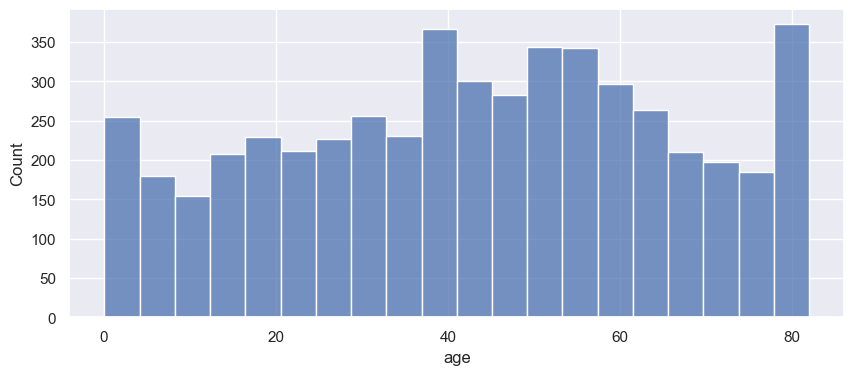

In [13]:
plt.figure(figsize=(10,4))
sns.histplot(stroke.age)

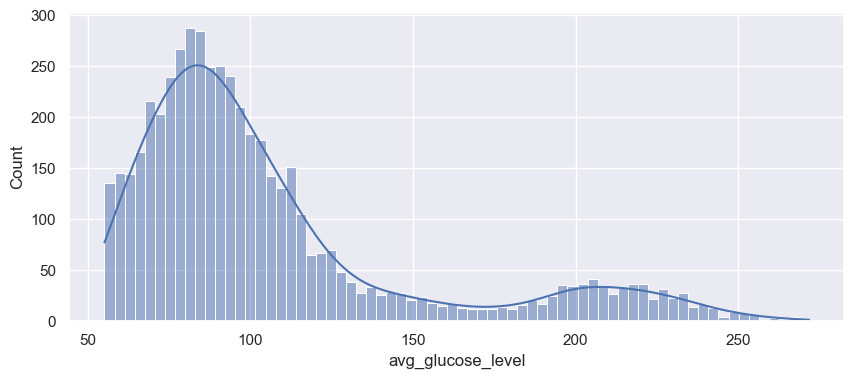

In [14]:
plt.figure(figsize=(10,4))
sns.histplot(stroke.avg_glucose_level,bins=70,kde = True);

In [15]:
print('avg_glucose_level below 70 and above 100 --->',round(len(stroke[(stroke.avg_glucose_level>100)|(stroke.avg_glucose_level<70)])/len(stroke)*100,2),'%')
print('avg_glucose_level between 70 and 100 --->',round(len(stroke[(stroke.avg_glucose_level<100)&(stroke.avg_glucose_level>70)])/len(stroke)*100,2),'%')

avg_glucose_level below 70 and above 100 ---> 53.47 %
avg_glucose_level between 70 and 100 ---> 46.49 %


<p style="font-family: Times New India; font-size:1.3em;">
53 % people in data don't have the normal avg_glucose level.</p>

---

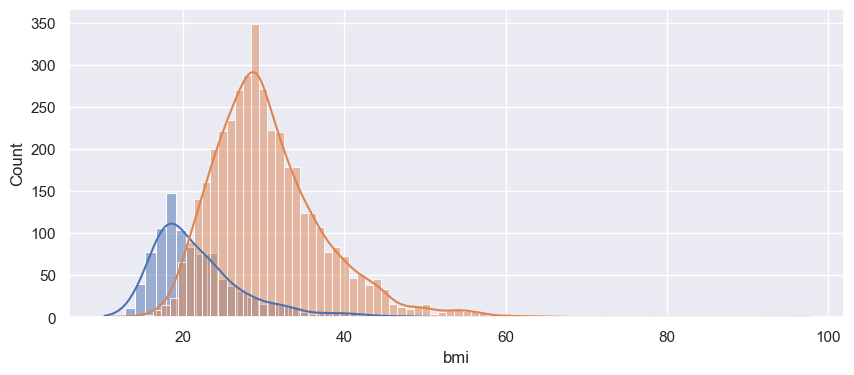

In [16]:
plt.figure(figsize=(10,4))
sns.histplot(stroke[brain_stroke.age<20].bmi,kde=True)
sns.histplot(stroke[brain_stroke.age>20].bmi,kde=True);

<p style="font-family: Times New India; font-size:1.3em;">
The BMI should be between 18.5 - 25 kg/m2 in adulds and 15 - 22 kg/m2 in children and adolescents.</br>  
There are more people whose BMI level is not as requrired.</p>

In [17]:
print('bmi below 15 and above 25 --->',round(len(stroke[(stroke.bmi<15)|(stroke.bmi>25)])/len(stroke)*100,2),'%')
print('bmi between 15 and 25 --->',round(len(stroke[(stroke.bmi<25)&(stroke.bmi>15)])/len(stroke)*100,2),'%')

bmi below 15 and above 25 ---> 69.07 %
bmi between 15 and 25 ---> 30.36 %


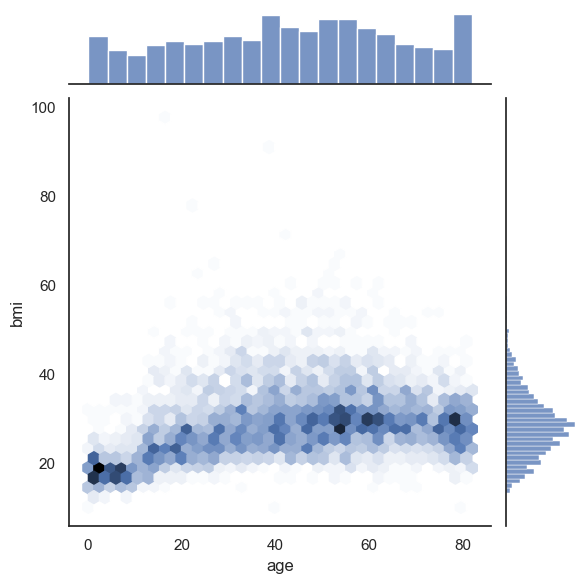

In [18]:
with sns.axes_style('white'):
    sns.jointplot(data = stroke, x='age', y='bmi', kind='hex')

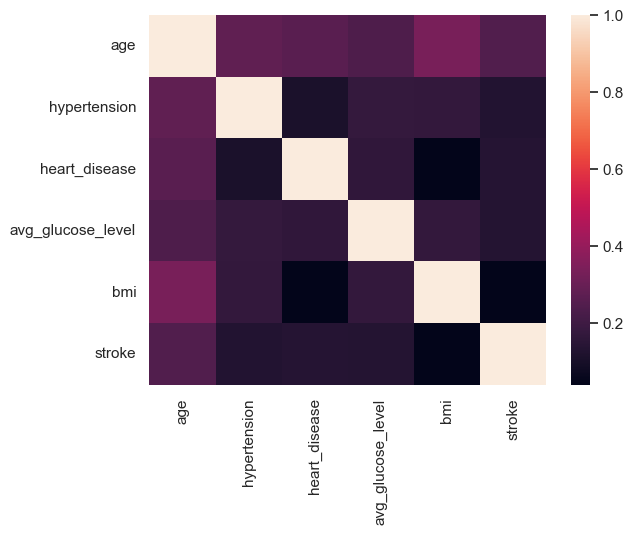

In [19]:
sns.heatmap(stroke.corr());

<p style="font-family: Times New India; font-size:1.3em;">
None of the features are highly correlated with each other.</p>

<p style="font-family: Times New India; font-size:1.3em;">
Percentage distribution of stroke by the categorical attributes.</p>

In [20]:
print('-'*20)
print('work_type')
print('-'*5)
i = 0
while i < len(stroke.work_type.unique())-1:
    df = stroke.work_type.unique()
    df1 = stroke[(stroke.work_type== df[i])].stroke.value_counts(normalize=True)
    print(df[i])
    print(f"{0} --- {round(df1[0]*100,2)}")
    print(f"{1} --- {round(df1[1]*100,2)}")
    i = i + 1
    print('-'*20)

--------------------
work_type
-----
Private
0 --- 94.9
1 --- 5.1
--------------------
Self-employed
0 --- 92.06
1 --- 7.94
--------------------
Govt_job
0 --- 94.98
1 --- 5.02
--------------------
children
0 --- 99.71
1 --- 0.29
--------------------


<p style="font-family: Times New India; font-size:1.3em;">
The work type don't make any significant difference of that a person has a chance of getting a stroke.</p>

In [21]:
print('-'*20)
for j in ['ever_married','gender','residence_type']:
    print(j)
    print('-'*5)
    for i in stroke[j].unique():
        df = stroke[(stroke[j]== i)].stroke.value_counts(normalize=True)
        print(i)
        print(f"{0} ---> {round(df[0]*100,2)}")
        print(f"{1} ---> {round(df[1]*100,2)}")
    print('-'*20)

--------------------
ever_married
-----
Yes
0 ---> 93.44
1 ---> 6.56
No
0 ---> 98.35
1 ---> 1.65
--------------------
gender
-----
Male
0 ---> 94.89
1 ---> 5.11
Female
0 ---> 95.29
1 ---> 4.71
--------------------
residence_type
-----
Urban
0 ---> 94.8
1 ---> 5.2
Rural
0 ---> 95.46
1 ---> 4.54
--------------------


<p style="font-family: Times New India; font-size:1.3em;">
The marital status, place of residence and gender don't make any significant difference for a person to has a chance of getting a stroke.</p>

In [22]:
print('-'*20)
for j in ['hypertension','heart_disease']:
    print(j)
    print('-'*5)
    for i in stroke[j].unique():
        df = stroke[(stroke[j]== i)].stroke.value_counts(normalize=True)
        print(i)
        print(f"{0} ---> {round(df[0]*100,2)}")
        print(f"{1} ---> {round(df[1]*100,2)}")
    print('-'*20)

--------------------
hypertension
-----
0
0 ---> 96.03
1 ---> 3.97
1
0 ---> 86.75
1 ---> 13.25
--------------------
heart_disease
-----
1
0 ---> 82.97
1 ---> 17.03
0
0 ---> 95.82
1 ---> 4.18
--------------------


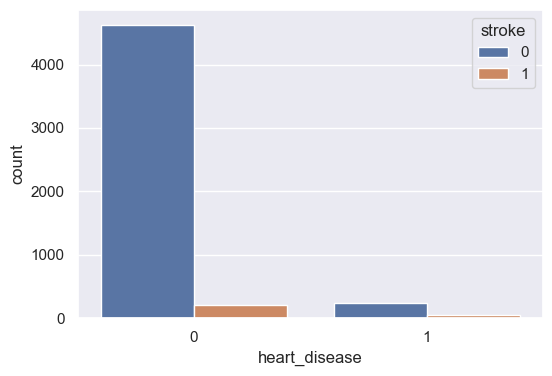

In [23]:
plt.figure(figsize=(6,4))
sns.countplot(data=stroke, x='heart_disease',hue='stroke');

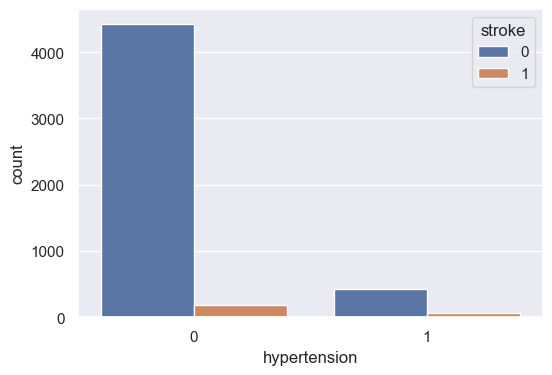

In [24]:
plt.figure(figsize=(6,4))
sns.countplot(data=stroke, x='hypertension',hue='stroke');

<p style="font-family: Times New India; font-size:1.3em;">
The hypertension and heart_disease has a significant impact to has a chance of getting stroke.<p/>

In [25]:
print('-'*20)
for i in stroke['gender'].unique():
    df = stroke[(stroke['gender']== i )&(stroke.age>55)].stroke.value_counts(normalize=True)
    print(i)
    print(f"{0} ---> {round(df[0]*100,2)}")
    print(f"{1} ---> {round(df[1]*100,2)}")
    print('-'*20)
    

--------------------
Male
0 ---> 86.45
1 ---> 13.55
--------------------
Female
0 ---> 88.49
1 ---> 11.51
--------------------


<p style="font-family: Times New India; font-size:1.3em;">
The risk of stroke after 55 years of age is 12% for women and 14% for men.</p>

In [26]:
brain_stroke[brain_stroke.stroke==1].age.mean()

67.72819277108434

<p style="font-family: Times New India; font-size:1.3em;">
The mean age of getting stroke is 68.</p>

---

In [27]:
brain_stroke['stroke'].value_counts(normalize=True)
# Value count in the stroke attribute

0    0.951272
1    0.048728
Name: stroke, dtype: float64

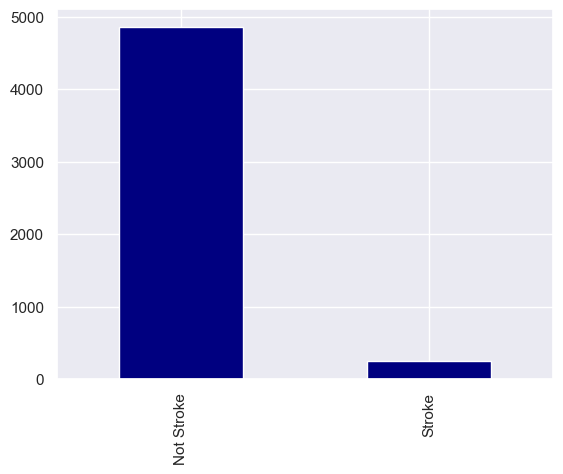

In [28]:
brain_stroke['stroke'].value_counts().plot(kind="bar",color = "navy")
plt.xticks(ticks=[0,1],labels=['Not Stroke', 'Stroke']);

In [29]:
print("% of people who actualy got a stroke : ",(brain_stroke['stroke'].value_counts()[1]/brain_stroke['stroke'].value_counts().sum()).round(3)*100)

% of people who actualy got a stroke :  4.9


<p style="font-family: Times New India; font-size:1.3em;">
- There is a class imbalance in our target variable which is stroke.</br>
- To handle the class imbalance we will do oversampling using smote and smoteenn</p>

---

#### $\color{purple}{\text{ Handling Outliers}}$ 


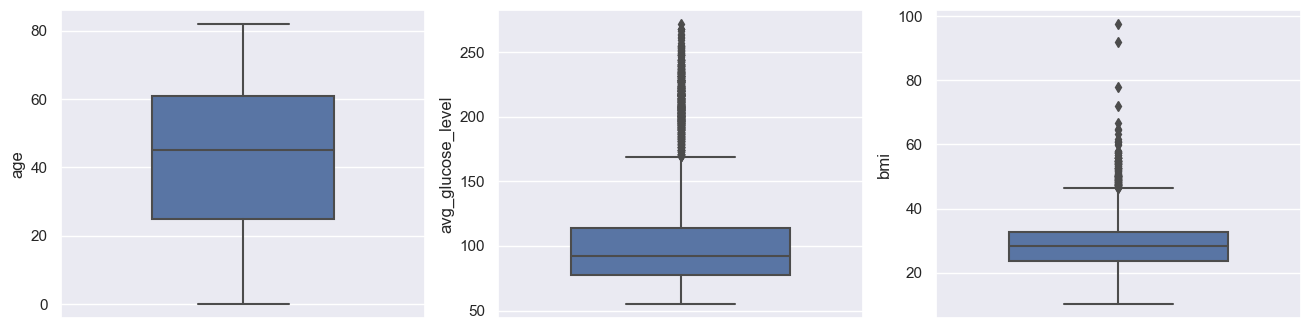

In [30]:
plt.figure(figsize=(16, 4))
sns.boxplot(y='age', data=stroke, ax=plt.subplot(1, 3, 1), width=0.5)
sns.boxplot(y='avg_glucose_level', data=stroke, ax=plt.subplot(1, 3, 2), width=0.6)
sns.boxplot(y='bmi', data=stroke, ax=plt.subplot(1, 3, 3), width=0.6)
plt.show()

In [31]:
categorical_name = ["gender", "hypertension", "heart_disease", "ever_married", "work_type", "residence_type", "smoking_status", "stroke"]
numerical_name = ["age", "avg_glucose_level", "bmi"]

In [32]:
for feature in numerical_name:
    Q1 = stroke.loc[:, feature].quantile(0.25)
    Q3 = stroke.loc[:, feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    try:
        stroke.loc[stroke[feature] < lower_bound, feature] = lower_bound
    except:
        print("No outlier data.")
    try:
        stroke.loc[stroke[feature] > upper_bound, feature] = upper_bound
    except:
        print("No outlier data.")

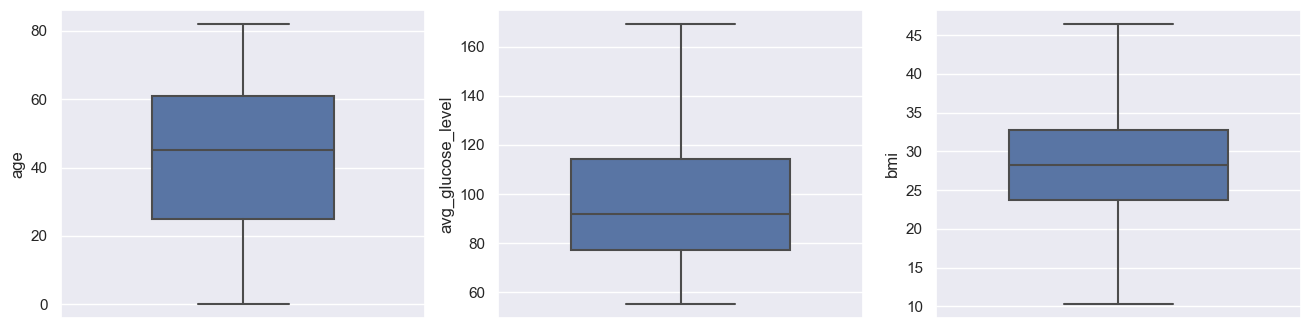

In [33]:
plt.figure(figsize=(16, 4))
sns.boxplot(y='age', data=stroke, ax=plt.subplot(1, 3, 1), width=0.5)
sns.boxplot(y='avg_glucose_level', data=stroke, ax=plt.subplot(1, 3, 2), width=0.6)
sns.boxplot(y='bmi', data=stroke, ax=plt.subplot(1, 3, 3), width=0.6)
plt.show()

Scaling

In [34]:
from sklearn import preprocessing
stroke[numerical_name] = preprocessing.scale(stroke[numerical_name])

#### $\color{purple}{\text{ Label Encoding}}$ 


In [35]:
le = LabelEncoder()

In [36]:
stroke[stroke.select_dtypes(include="object").columns] = stroke[stroke.select_dtypes(include="object").columns].apply(le.fit_transform)

In [37]:
X = stroke.drop('stroke', axis=1)
y = stroke.stroke

#### $\color{purple}{\text{ Smote}}$ 


In [38]:
smote = SMOTE(random_state=2)
print('Original dataset shape %s' % Counter(y))
X_smote, y_smote = smote.fit_resample(X, y)
print('Resampled dataset shape %s' % Counter(y_smote))

Original dataset shape Counter({0: 4860, 1: 249})
Resampled dataset shape Counter({1: 4860, 0: 4860})


In [39]:
X_train_smote, X_test_smote, y_train_smote, y_test_smote = train_test_split(X_smote,y_smote, test_size=.2,random_state=42)

In [40]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [41]:
X_train_smote = scaler.fit_transform(X_train_smote)
X_test_smote = scaler.fit_transform(X_test_smote)

#### $\color{purple}{\text{ Smoteenn}}$ 


In [42]:
smoten = SMOTEENN(random_state=2)
print('Original dataset shape %s' % Counter(y))
X_smoten, y_smoten = smoten.fit_resample(X, y)
print('Resampled dataset shape %s' % Counter(y_smote))

Original dataset shape Counter({0: 4860, 1: 249})
Resampled dataset shape Counter({1: 4860, 0: 4860})


In [43]:
X_train_smoten, X_test_smoten, y_train_smoten, y_test_smoten = train_test_split(X_smoten,y_smoten, test_size=.2,random_state=42)

In [44]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [45]:
X_train_smoten = scaler.fit_transform(X_train_smoten)
X_test_smoten = scaler.fit_transform(X_test_smoten)

---

### $\color{Navy}{\text{ Logistic}}$ 


Using Smote

In [46]:
param_grid = {
    'penalty': ['l1', 'l2'],            # Regularization penalty
    'C': [0.001, 0.01, 0.1, 1, 10, 100], # Inverse of regularization strength
    'max_iter': [100, 200, 300]          # Maximum number of iterations taken for the solvers to converge
}

In [47]:
lr_smote = LogisticRegression()

grid_search = GridSearchCV(lr_smote, param_grid, cv=5)
grid_search.fit(X_train_smote,y_train_smote)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'max_iter': [100, 200, 300], 'penalty': ['l1', 'l2']})

In [48]:
grid_search.best_params_

{'C': 10, 'max_iter': 100, 'penalty': 'l2'}

In [49]:
lr_smote = LogisticRegression(C= 10, max_iter= 100, penalty= 'l2')
lr_smote.fit(X_train_smote,y_train_smote)
y_pred_smote = lr_smote.predict(X_test_smote)
print("Accuracy score of the logistic regression {} .  ".format((round(accuracy_score(y_test_smote,y_pred_smote),2)*100)))

Accuracy score of the logistic regression 79.0 .  


In [50]:
cross_val_results = cross_val_score(lr_smote,X_train_smote,y_train_smote, cv=10)
cross_val_results.mean()

0.7793260943646547

In [51]:
confusion_matrix(y_test_smote,y_pred_smote)

array([[742, 234],
       [169, 799]], dtype=int64)

In [52]:
print(classification_report(y_test_smote,y_pred_smote))

              precision    recall  f1-score   support

           0       0.81      0.76      0.79       976
           1       0.77      0.83      0.80       968

    accuracy                           0.79      1944
   macro avg       0.79      0.79      0.79      1944
weighted avg       0.79      0.79      0.79      1944



Using Smoteenn

In [53]:
param_grid = {
    'penalty': ['l1', 'l2'],            # Regularization penalty
    'C': [0.001, 0.01, 0.1, 1, 10, 100], # Inverse of regularization strength
    'max_iter': [100, 200, 300]          # Maximum number of iterations taken for the solvers to converge
}

In [54]:
lr_smoten = LogisticRegression()

grid_search = GridSearchCV(lr_smoten, param_grid, cv=5)
grid_search.fit(X_train_smoten,y_train_smoten)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'max_iter': [100, 200, 300], 'penalty': ['l1', 'l2']})

In [55]:
grid_search.best_params_

{'C': 1, 'max_iter': 100, 'penalty': 'l2'}

In [56]:
lr_smoten = LogisticRegression(C= 1, max_iter= 100, penalty= 'l2')
lr_smoten.fit(X_train_smoten,y_train_smoten)
y_pred_smoten = lr_smoten.predict(X_test_smoten)
print("Accuracy score of the logistic regression {} .  ".format((round(accuracy_score(y_test_smoten,y_pred_smoten),2)*100)))

Accuracy score of the logistic regression 84.0 .  


In [57]:
cross_val_results = cross_val_score(lr_smoten,X_train_smoten,y_train_smoten, cv=10)
cross_val_results.mean()

0.8439130434782609

In [58]:
confusion_matrix(y_test_smoten,y_pred_smoten)

array([[639, 155],
       [129, 802]], dtype=int64)

In [59]:
print(classification_report(y_test_smoten,y_pred_smoten))

              precision    recall  f1-score   support

           0       0.83      0.80      0.82       794
           1       0.84      0.86      0.85       931

    accuracy                           0.84      1725
   macro avg       0.84      0.83      0.83      1725
weighted avg       0.84      0.84      0.84      1725



### $\color{Navy}{\text{ KNN}}$ 

Using Smoke

In [60]:
param_grid = {
    'n_neighbors': range(10,20),
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'weights': ['uniform', 'distance']
}

In [61]:
knn_smote = KNeighborsClassifier()
grid_search = GridSearchCV(knn_smote, param_grid, cv=5)
grid_search.fit(X_train_smote,y_train_smote)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': range(10, 20),
                         'weights': ['uniform', 'distance']})

In [62]:
grid_search.best_params_

{'algorithm': 'auto', 'n_neighbors': 10, 'weights': 'distance'}

In [63]:
knn_smote = KNeighborsClassifier(n_neighbors=10,weights='distance')
knn_smote.fit(X_train_smote,y_train_smote)
y_pred_smote = knn_smote.predict(X_test_smote)
print("Accuracy score of the knn {} .  ".format((round(accuracy_score(y_test_smote,y_pred_smote),2)*100)))

Accuracy score of the knn 88.0 .  


In [65]:
cross_val_results = cross_val_score(knn_smote,X_train_smoten,y_train_smoten, cv=10)
cross_val_results.mean()

0.9281159420289855

In [66]:
confusion_matrix(y_test_smote,y_pred_smote)

array([[759, 217],
       [ 15, 953]], dtype=int64)

In [67]:
print(classification_report(y_test_smote, y_pred_smote))

              precision    recall  f1-score   support

           0       0.98      0.78      0.87       976
           1       0.81      0.98      0.89       968

    accuracy                           0.88      1944
   macro avg       0.90      0.88      0.88      1944
weighted avg       0.90      0.88      0.88      1944



Using Smoken

In [68]:
param_grid = {
    'n_neighbors': range(10,20),
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'weights': ['uniform', 'distance']
}

In [69]:
knn_smoten = KNeighborsClassifier()
grid_search = GridSearchCV(knn_smoten, param_grid, cv=5)
grid_search.fit(X_train_smoten,y_train_smoten)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': range(10, 20),
                         'weights': ['uniform', 'distance']})

In [70]:
grid_search.best_params_

{'algorithm': 'auto', 'n_neighbors': 10, 'weights': 'distance'}

In [71]:
knn_smoten = KNeighborsClassifier(n_neighbors=10,weights='distance')
knn_smoten.fit(X_train_smoten,y_train_smoten)
y_pred_smoten = knn_smoten.predict(X_test_smoten)
print("Accuracy score of the knn {} .  ".format((round(accuracy_score(y_test_smoten,y_pred_smoten),2)*100)))

Accuracy score of the knn 93.0 .  


In [72]:
cross_val_results = cross_val_score(knn_smoten,X_train_smoten,y_train_smoten, cv=10)
cross_val_results.mean()

0.9281159420289855

In [73]:
confusion_matrix(y_test_smoten,y_pred_smoten)

array([[681, 113],
       [ 10, 921]], dtype=int64)

In [74]:
print(classification_report(y_test_smoten, y_pred_smoten))

              precision    recall  f1-score   support

           0       0.99      0.86      0.92       794
           1       0.89      0.99      0.94       931

    accuracy                           0.93      1725
   macro avg       0.94      0.92      0.93      1725
weighted avg       0.93      0.93      0.93      1725



### $\color{Navy}{\text{ Decision Tree}}$ 


Using Smoke

In [75]:
param_grid = {'criterion' : ['gini', 'entropy'],
              'max_depth': range(4,9),
              'min_samples_split':[50,60,70,80,90,100,110,120]}

In [76]:
dt_smote = DecisionTreeClassifier()

grid_search = GridSearchCV(dt_smote, param_grid, cv=5)
grid_search.fit(X_train_smote,y_train_smote)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(4, 9),
                         'min_samples_split': [50, 60, 70, 80, 90, 100, 110,
                                               120]})

In [77]:
grid_search.best_params_

{'criterion': 'gini', 'max_depth': 8, 'min_samples_split': 80}

In [78]:
dt_smote = DecisionTreeClassifier(criterion= 'gini', max_depth= 8, min_samples_split= 80)
dt_smote.fit(X_train_smote,y_train_smote)
y_pred_smote = dt_smote.predict(X_test_smote)
print("Accuracy score of the dt {} .  ".format((round(accuracy_score(y_test_smote,y_pred_smote),2)*100)))

Accuracy score of the knn 83.0 .  


In [79]:
cross_val_results = cross_val_score(dt_smote,X_train_smoten,y_train_smoten, cv=10)
cross_val_results.mean()

0.8892753623188405

In [80]:
confusion_matrix(y_test_smote,y_pred_smote)

array([[731, 245],
       [ 95, 873]], dtype=int64)

In [81]:
print(classification_report(y_test_smote, y_pred_smote))

              precision    recall  f1-score   support

           0       0.88      0.75      0.81       976
           1       0.78      0.90      0.84       968

    accuracy                           0.83      1944
   macro avg       0.83      0.83      0.82      1944
weighted avg       0.83      0.83      0.82      1944



Using Smoken

In [82]:
param_grid = {'criterion' : ['gini', 'entropy'],
              'max_depth': range(4,9),
              'min_samples_split':[50,60,70,80,90,100,110,120]}

In [83]:
dt_smoten = DecisionTreeClassifier()
grid_search = GridSearchCV(dt_smoten, param_grid, cv=5)
grid_search.fit(X_train_smoten,y_train_smoten)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(4, 9),
                         'min_samples_split': [50, 60, 70, 80, 90, 100, 110,
                                               120]})

In [84]:
grid_search.best_params_

{'criterion': 'entropy', 'max_depth': 8, 'min_samples_split': 50}

In [85]:
dt_smoten = DecisionTreeClassifier(criterion= 'entropy', max_depth= 8, min_samples_split= 50)
dt_smoten.fit(X_train_smoten,y_train_smoten)
y_pred_smoten = dt_smoten.predict(X_test_smoten)
print("Accuracy score of the dt {} .  ".format((round(accuracy_score(y_test_smoten,y_pred_smoten),2)*100)))

Accuracy score of the knn 87.0 .  


In [86]:
cross_val_results = cross_val_score(dt_smoten,X_train_smoten,y_train_smoten, cv=10)
cross_val_results.mean()

0.8897101449275361

In [87]:
confusion_matrix(y_test_smoten,y_pred_smoten)

array([[639, 155],
       [ 72, 859]], dtype=int64)

In [88]:
print(classification_report(y_test_smoten, y_pred_smoten))

              precision    recall  f1-score   support

           0       0.90      0.80      0.85       794
           1       0.85      0.92      0.88       931

    accuracy                           0.87      1725
   macro avg       0.87      0.86      0.87      1725
weighted avg       0.87      0.87      0.87      1725



### $\color{Navy}{\text{ Random Forest}}$ 

Using Smoke

In [89]:
param_grid = {'n_estimators': [90,100,110],
              'criterion' : ['gini', 'entropy'],
              'max_depth': range(6,10),
              'min_samples_split':[50,60,70]}

In [90]:
rf_smote = RandomForestClassifier()

grid_search = GridSearchCV(rf_smote, param_grid, cv=5)
grid_search.fit(X_train_smote,y_train_smote)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(6, 10),
                         'min_samples_split': [50, 60, 70],
                         'n_estimators': [90, 100, 110]})

In [91]:
grid_search.best_params_

{'criterion': 'gini',
 'max_depth': 9,
 'min_samples_split': 50,
 'n_estimators': 110}

In [92]:
rf_smote = RandomForestClassifier(criterion= 'gini', max_depth= 9, min_samples_split= 50, n_estimators = 110)
rf_smote.fit(X_train_smote,y_train_smote)
y_pred_smote = rf_smote.predict(X_test_smote)
print("Accuracy score of the rf {} .  ".format((round(accuracy_score(y_test_smote,y_pred_smote),2)*100)))

Accuracy score of the knn 84.0 .  


In [93]:
cross_val_results = cross_val_score(rf_smote,X_train_smoten,y_train_smoten, cv=10)
cross_val_results.mean()

0.8882608695652173

In [94]:
confusion_matrix(y_test_smote,y_pred_smote)

array([[746, 230],
       [ 76, 892]], dtype=int64)

In [95]:
print(classification_report(y_test_smote, y_pred_smote))

              precision    recall  f1-score   support

           0       0.91      0.76      0.83       976
           1       0.80      0.92      0.85       968

    accuracy                           0.84      1944
   macro avg       0.85      0.84      0.84      1944
weighted avg       0.85      0.84      0.84      1944



Using Smoken

In [96]:
param_grid = {'n_estimators': [90,100,110],
              'criterion' : ['gini', 'entropy'],
              'max_depth': range(6,10),
              'min_samples_split':[50,60,70]}

In [97]:
rf_smoten = RandomForestClassifier()
grid_search = GridSearchCV(rf_smoten, param_grid, cv=5)
grid_search.fit(X_train_smoten,y_train_smoten)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(4, 9),
                         'min_samples_split': [50, 60, 70, 80, 90, 100, 110,
                                               120]})

In [98]:
grid_search.best_params_

{'criterion': 'entropy', 'max_depth': 8, 'min_samples_split': 50}

In [99]:
rf_smoten = RandomForestClassifier(criterion= 'entropy', max_depth= 8, min_samples_split= 50)
rf_smoten.fit(X_train_smoten,y_train_smoten)
y_pred_smoten = rf_smoten.predict(X_test_smoten)
print("Accuracy score of the rf {} .  ".format((round(accuracy_score(y_test_smoten,y_pred_smoten),2)*100)))

Accuracy score of the knn 88.0 .  


In [100]:
cross_val_results = cross_val_score(rf_smoten,X_train_smoten,y_train_smoten, cv=10)
cross_val_results.mean()

0.8940579710144927

In [101]:
confusion_matrix(y_test_smoten,y_pred_smoten)

array([[640, 154],
       [ 59, 872]], dtype=int64)

In [102]:
print(classification_report(y_test_smoten, y_pred_smoten))

              precision    recall  f1-score   support

           0       0.92      0.81      0.86       794
           1       0.85      0.94      0.89       931

    accuracy                           0.88      1725
   macro avg       0.88      0.87      0.87      1725
weighted avg       0.88      0.88      0.88      1725



---

## **Conclusion**: 
<p style="font-family: Times New India; font-size:1.3em;">
The final model is knn after oversampling using SMOTEENN, it is giving the highest recall score and accuracy.</p>

<p style="font-family: Times New India; font-size:1.3em;">
Our machine learning model for brain stroke prediction demonstrates promising results, achieving an accuracy of 93% on our test dataset and the recall score is around 92%.</br></br>   
Features such as age, hypertension, and BMI were found to be the most influential in predicting strokes.</br> 
However, the model's performance might vary in real-world scenarios and might require further validation in clinical settings.</br>
Despite these limitations, the model shows potential in assisting healthcare providers in early identification and intervention for at-risk individuals.</br></br> 
Future work could focus on incorporating more diverse data sources and improving the model's robustness for widespread clinical application.</p>  

---